<a href="https://colab.research.google.com/github/mtuntang/Market-Pulse-AI/blob/main/MarketPulse_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home
<div class="markdown-google-sans">
  <h1>MarketPulse AI</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore MarketPulse AI</h2>

---

  <p>A Notebook application that combines stock price data and recent news analysis for selected companies. It pulls real-time financial data from Alpha Vantage and relevant stock-specific news from StockNewsAPI, then uses an LLM to provide concise summaries and sentiment analysis.
  </p>
</div>


# Step 1: Notebook Setup and Imports







In [29]:
# Install required libraries if not already installed
!pip install alpha_vantage newsapi-python openai
!pip install python-dotenv


# Import libraries
from alpha_vantage.timeseries import TimeSeries
from newsapi import NewsApiClient
import openai
import pandas as pd
from IPython.display import display, Markdown


# Step 2: Configuration


In [30]:
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Retrieve API keys from environment variables
# API Keys - You can also replace these with your own keys
ALPHA_VANTAGE_API_KEY = os.getenv('ALPHA_VANTAGE_API_KEY')
FINNHUB_API_KEY = os.getenv('FINNHUB_API_KEY')
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')


# Set up the APIs
from alpha_vantage.timeseries import TimeSeries
import openai

# Initialize Alpha Vantage and OpenAI configurations
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')
openai.api_key = OPENAI_API_KEY

ValueError: The AlphaVantage API key must be provided either through the key parameter or through the environment variable ALPHAVANTAGE_API_KEY. Get a free key from the alphavantage website: https://www.alphavantage.co/support/#api-key

# Step 3: Data Fetching Functions

<div class="markdown-google-sans">

---

  </n>
  <p>In this step, we’ll create functions to:</p>
  <ol>
    <li>
      Retrieve stock data from Alpha Vantage.
    </li>
    <li>
      Fetch recent news articles from Finnhub related to a specific stock symbol.
    </li>
  </ol>
  

</div>







<strong>Function to Fetch Stock Data</strong>
<p>This function will use Alpha Vantage to get the latest stock data for a given symbol.</p>





In [28]:
# Prompt user for stock ticker symbol
stock_symbol = input("Enter the stock ticker symbol (e.g., AAPL for Apple, GME for GameStop): ").upper()

def get_stock_data(symbol):
    try:
        # Fetch monthly time series data for the given ticker symbol
        stock_data, meta_data = ts.get_monthly(symbol=symbol)

        # Filter the data to the past 12 months
        past_year_data = stock_data.head(12)  # Selects the first 12 rows, which correspond to the last 12 months

        return past_year_data
    except Exception as e:
        print("Error fetching stock data:", e)
        return None

# Fetch stock data using the user-provided ticker symbol
stock_data = get_stock_data(stock_symbol)

# Display stock data if available
if stock_data is not None:
    print(f"Monthly Stock Data for {stock_symbol} (Past Year):")
    print(stock_data)
else:
    print("No data found for the given ticker symbol.")


Enter the stock ticker symbol (e.g., AAPL for Apple, GME for GameStop): GME
Error fetching stock data: Expecting value: line 1 column 1 (char 0)
No data found for the given ticker symbol.


<p>Plotting the chart:</p>

Monthly Stock Data for GME (Past Year):


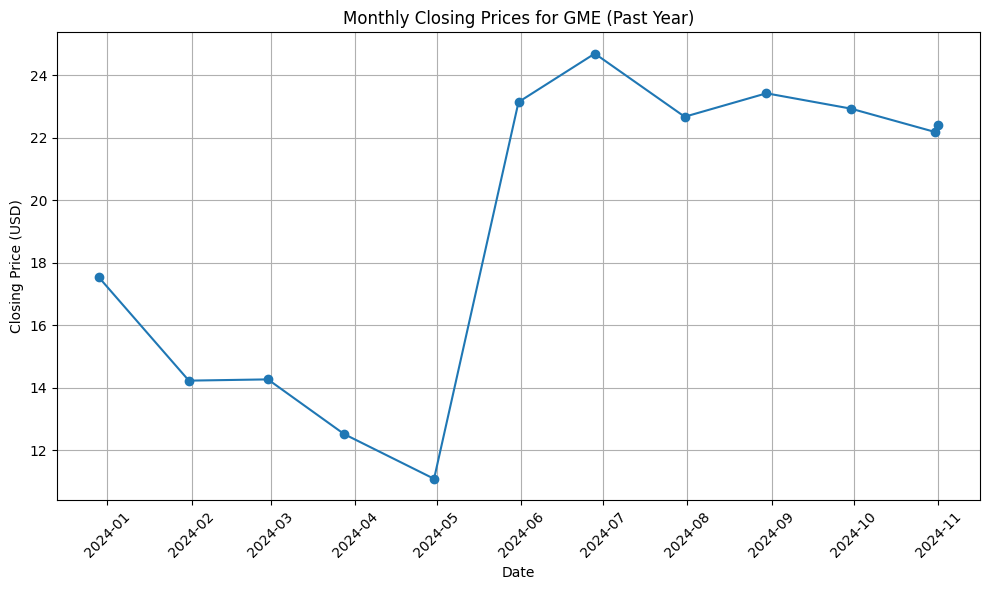

In [ ]:
import matplotlib.pyplot as plt

if stock_data is not None:
    print(f"Monthly Stock Data for {stock_symbol} (Past Year):")

    # Plotting the closing prices over the past year
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['4. close'], marker='o')
    plt.title(f"Monthly Closing Prices for {stock_symbol} (Past Year)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data found for the given ticker symbol.")